## Código principal, Exportación del pulso binaural

### Importacion de librerías

In [1]:
from AccelBrainBeat.brainbeat.binaural_beat import BinauralBeat
from pydub import AudioSegment


ruta=r'C:\ffmpeg\bin'

AudioSegment.converter = ruta+"\ffmpeg.exe"
AudioSegment.ffmpeg = ruta+"\ffmpeg.exe"
AudioSegment.ffprobe =ruta+"\ffprobe.exe" 

### Importación de pista y generación de pulso

In [2]:
# Cargar la pista de audio
pista = AudioSegment.from_file("pista.wav")
# Configuración de AccelBrainBeat
brain_mixed = BinauralBeat()

### Exportación de audios

In [3]:
# ----------------------------------------------------------------------------------------------------------------------------------------
#                                                GENERADOR DE UN SOLO PULSO BINAURAL CONSTANTE
# ----------------------------------------------------------------------------------------------------------------------------------------
def binaural_player(freq_izq, freq_der, time_var, volumen=1, in_=1000, out=2000):     
        #Para mezcla 
        time_var = time_var * 60

        brain_mixed.save_beat(output_file_name="beat_mixed.wav", frequencys=(freq_izq, freq_der), play_time=time_var, volume=volumen)
        beat_mixed = AudioSegment.from_file("beat_mixed.wav")
        mixed_beat = beat_mixed.overlay(pista).fade_in(in_).fade_out(out) - 40

        #Imprimir mensajes de frecuencias 
        print('Frecuencias exportadas: '+str(freq_izq)+'-'+ str(freq_der))

        # Exportar el pulso mezclado a un archivo .wav
        mixed_beat.export("freq_"+str(freq_izq)+"_"+ str(freq_der)+".wav", format="wav")

In [4]:
#frecuencia izquierda, frecuencia derecha, duracion del audio en minutos
binaural_player(210, 220, 1) 

Frecuencias exportadas: 210-220


----------------------------------------------------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------------------------------------------------

## Código secundario, Reproducción pulso binaural constante

### Importación de librerías

In [1]:
import threading

from AccelBrainBeat.brainbeat.binaural_beat import BinauralBeat
from pydub import AudioSegment
from pydub.playback import play

ruta=r'C:\ffmpeg\bin'

AudioSegment.converter = ruta+"\ffmpeg.exe"
AudioSegment.ffmpeg = ruta+"\ffmpeg.exe"
AudioSegment.ffprobe =ruta+"\ffprobe.exe" 

output_dir  = r'../Documents/Pulsos Binaurales'

In [2]:
# Cargar la pista de audio
pista = AudioSegment.from_file("pista.wav")
# Configuración de AccelBrainBeat
brain_beat = BinauralBeat()

In [3]:
# ----------------------------------------------------------------------------------------------------------------------------------------
#                                                GENERADOR DE UN SOLO PULSO BINAURAL CONSTANTE
# ----------------------------------------------------------------------------------------------------------------------------------------
def binaural_player_const(freq_izq, freq_der, volumen=1,in_=10, out=2000):
        # Cargar el sonido una vez
        brain_beat.save_beat(output_file_name="beat.wav", frequencys=(freq_izq, freq_der), play_time=15, volume=volumen)
        beat = AudioSegment.from_file("beat.wav")
        mixed = beat.overlay(pista).fade_in(in_).fade_out(out) - 40

        # Imprimir mensajes de frecuencias 
        print('Frecuencias reproducidas: ' + str(freq_izq) + '-' + str(freq_der))
        play(mixed)

### Ciclo continuo

In [4]:
# Iniciar la reproducción en un hilo
while(1):
    t = threading.Thread(target=binaural_player_const, args=(220, 250))
    t.start()
    t.join()

#Se deben esperar unos segundos para que comience la reproducción

Frecuencias reproducidas: 220-250
Frecuencias reproducidas: 220-250


KeyboardInterrupt: 

----------------------------------------------------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------------------------------------------------

## Extra, verificación de las frecuencias centrales

### Importación de librerías

In [3]:
from scipy.io import wavfile
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq

plt.rcParams['figure.figsize'] = [20, 10]

### Guardar el pulso con la pista

In [5]:
# Cargar la pista de audio
pista = AudioSegment.from_file("pista.wav")

beat = AudioSegment.from_file("beat.wav")
mixed = beat.overlay(pista).fade_in(100).fade_out(1000)-20
mixed.export('beat_plus_carrier.wav',format='wav')

<_io.BufferedRandom name='beat_plus_carrier.wav'>

### Verificar la forma de onda del canal izquierdo y derecho del pulso binaural original

number of channels = 2
length = 300.0s
Sample Rate = 44100 Hz


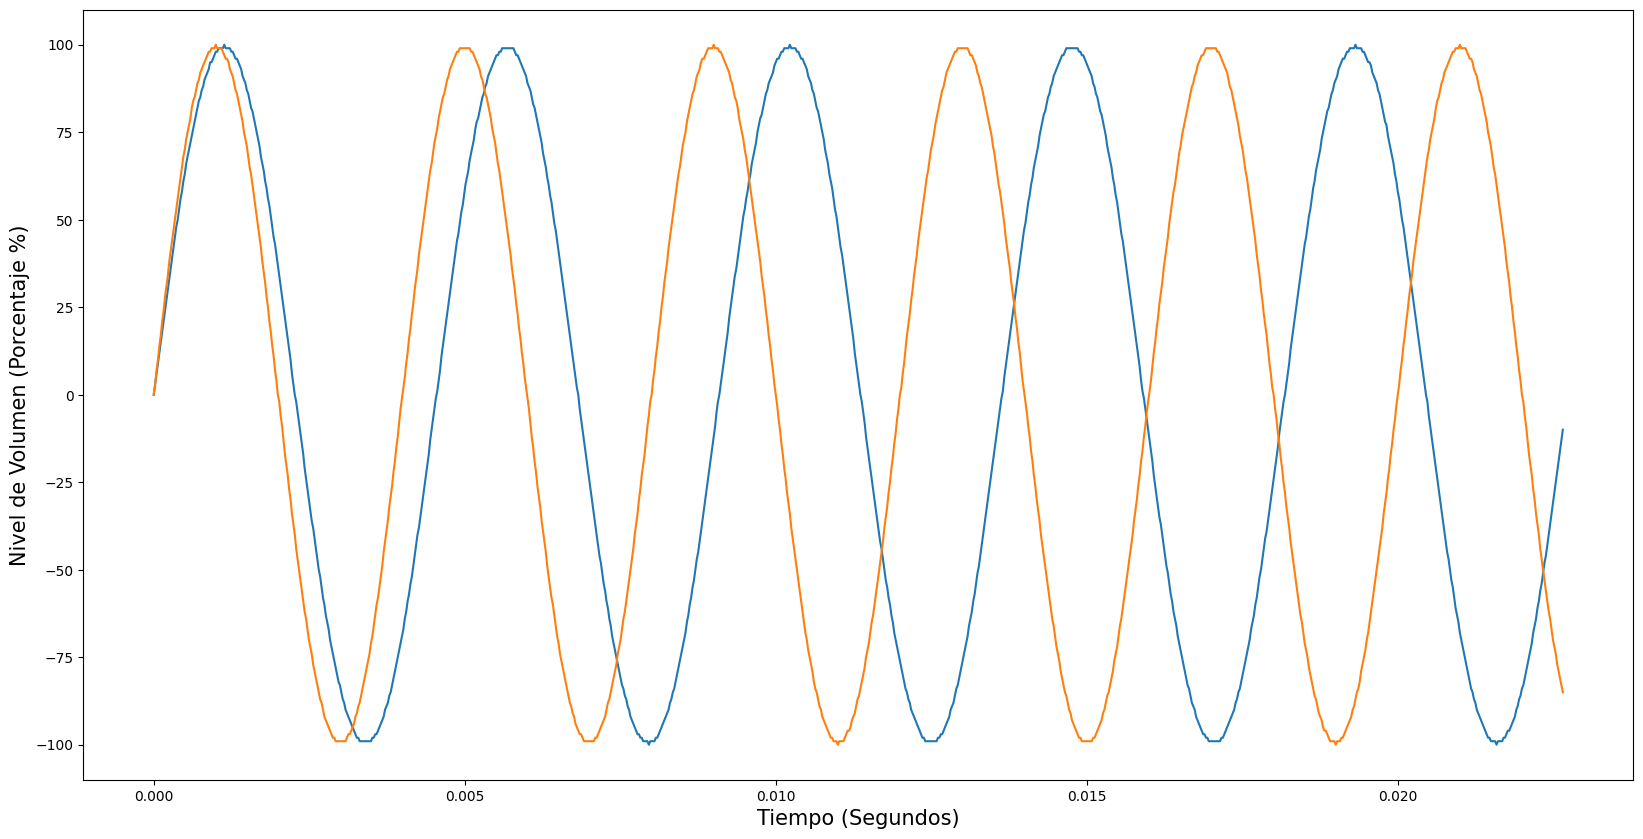

In [6]:
samplerate, data = wavfile.read('beat.wav')
print(f"number of channels = {data.shape[1]}")
length = data.shape[0] / samplerate
print(f"length = {length}s")
print(f"Sample Rate = {samplerate} Hz")

xvector=np.linspace(0,length,len(data))

normalized_tone = np.int16((data / data.max()) * 100)

plt.plot(xvector[:1000],normalized_tone[:1000])
plt.ylabel('Nivel de Volumen (Porcentaje %)', fontsize=15)
plt.xlabel('Tiempo (Segundos)', fontsize=15)
plt.show()

### Verificar la transformada de Fourier para observar frecuencias centrales del pulso original

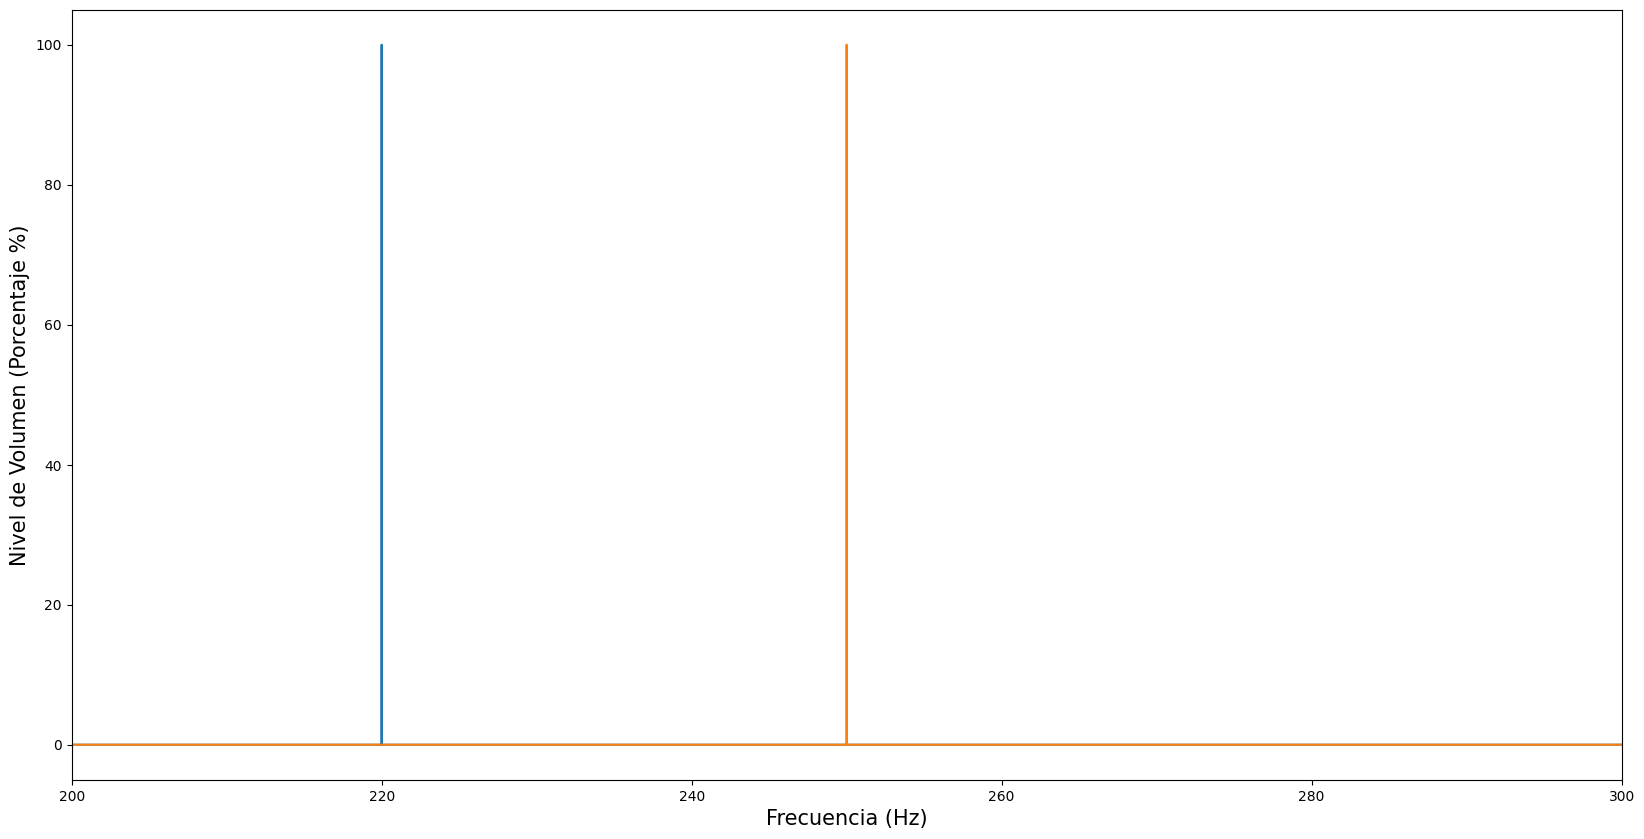

In [8]:
N = samplerate * length

yf = rfft(normalized_tone[:,0])
xf = rfftfreq(int(N), 1 / samplerate)

N = samplerate * length
yf1 = rfft(normalized_tone[:,1])
xf1 = rfftfreq(int(N), 1 / samplerate)

plt.plot(xf, (np.abs(yf)/np.abs(yf).max())*100)
plt.plot(xf1, (np.abs(yf1)/np.abs(yf1).max())*100)
plt.xlim([200,300])
plt.ylabel('Nivel de Volumen (Porcentaje %)', fontsize=15)
plt.xlabel('Frecuencia (Hz)', fontsize=15)
# plt.
plt.show()

### Verificar la forma de onda del canal izquierdo y derecho del pulso binaural junto con pista

number of channels = 2
length = 300.0s
Sample Rate = 48000 Hz


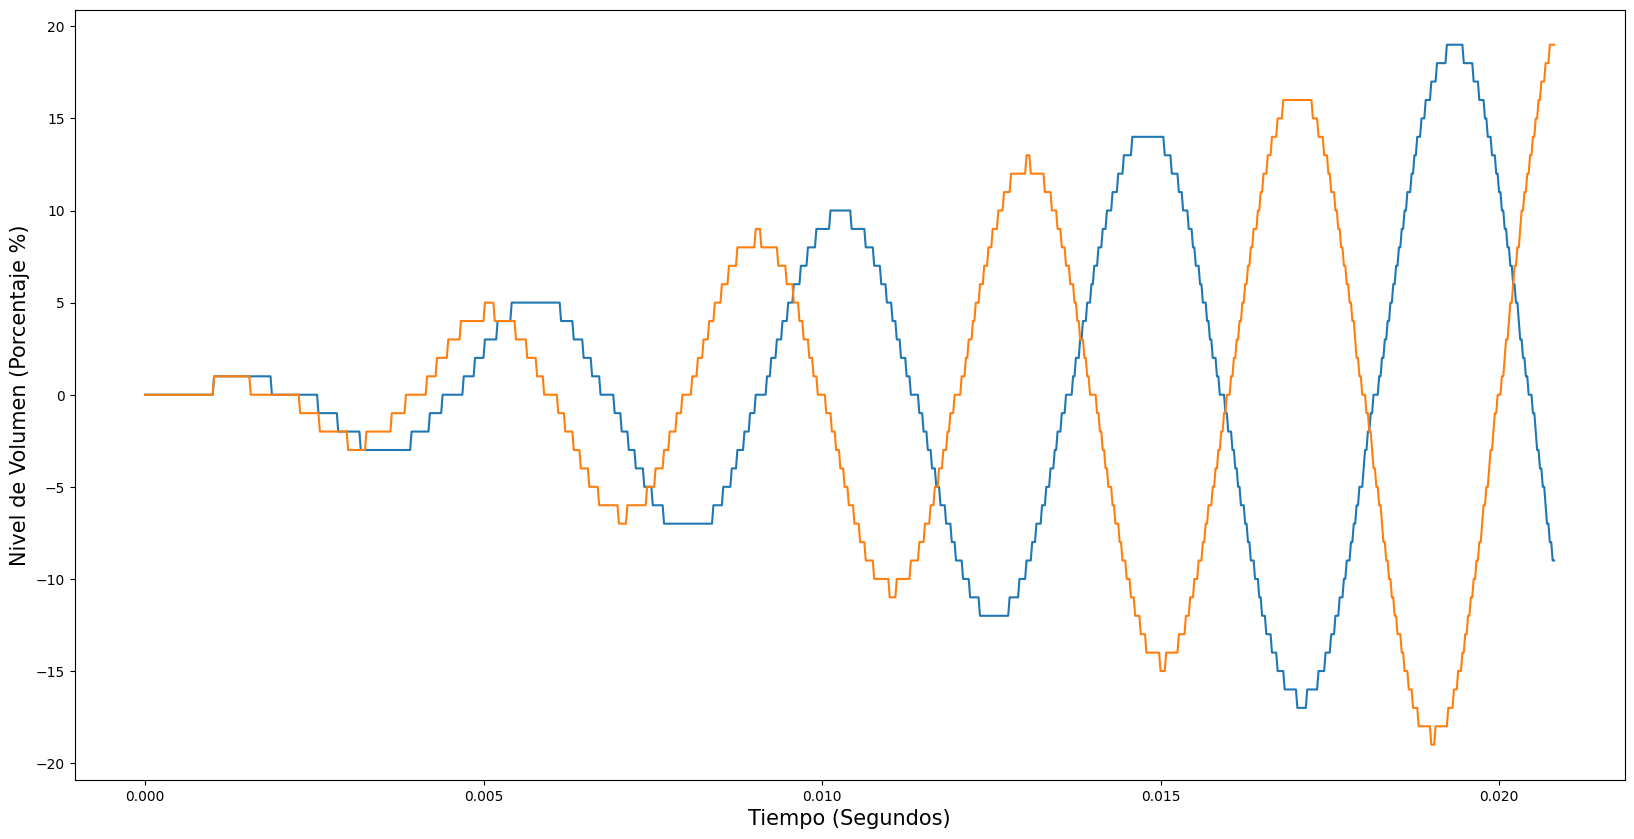

In [9]:
samplerate, data = wavfile.read('beat_plus_carrier.wav')
print(f"number of channels = {data.shape[1]}")
length = data.shape[0] / samplerate
print(f"length = {length}s")
print(f"Sample Rate = {samplerate} Hz")

xvector=np.linspace(0,length,len(data))

normalized_tone = np.int16((data / data.max()) * 100)

fig=plt.plot(xvector[:1000],normalized_tone[:1000])

plt.ylabel('Nivel de Volumen (Porcentaje %)', fontsize=15)
plt.xlabel('Tiempo (Segundos)', fontsize=15)
plt.show()

### Verificar la transformada de Fourier para observar frecuencias centrales del pulso junto con pista

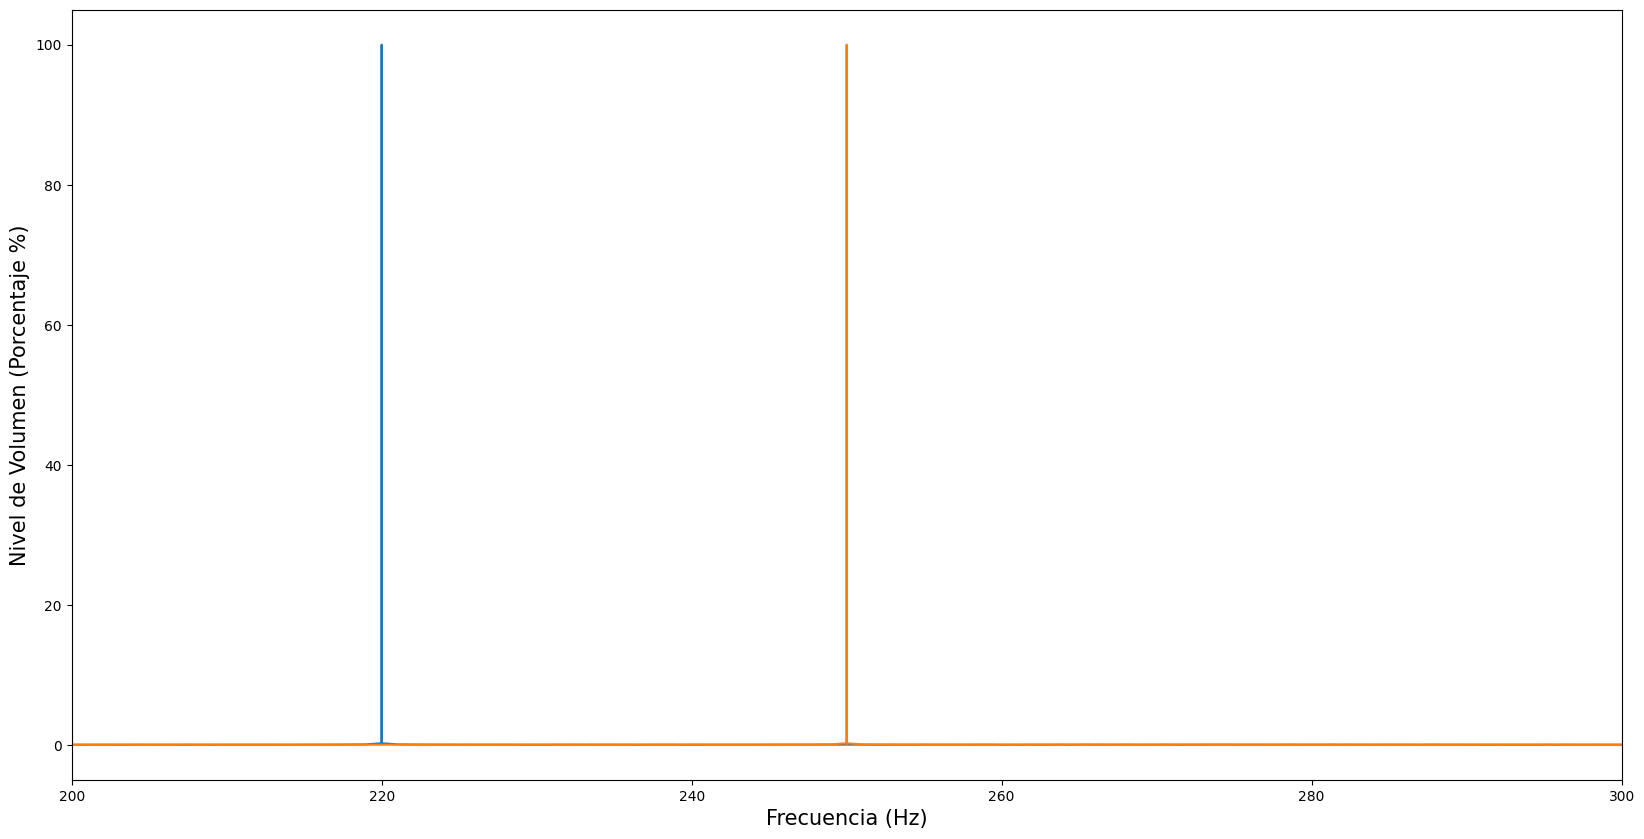

In [11]:
N = samplerate * length

yf = rfft(normalized_tone[:,0])
xf = rfftfreq(int(N), 1 / samplerate)

N = samplerate * length
yf1 = rfft(normalized_tone[:,1])
xf1 = rfftfreq(int(N), 1 / samplerate)

plt.plot(xf, (np.abs(yf)/np.abs(yf).max())*100)
plt.plot(xf1, (np.abs(yf1)/np.abs(yf1).max())*100)
plt.xlim([200,300])
plt.ylabel('Nivel de Volumen (Porcentaje %)', fontsize=15)
plt.xlabel('Frecuencia (Hz)', fontsize=15)
plt.show()